## Implementation of a convnets autoencoder using TensorFlow backend and Keras
### Author: Tuan Le
### Email: tuanle@hotmail.de

In this case we will use the Zalando FASHION MNIST dataset. The dataset will be loaded from `tensorflow.keras.datasets` module via the Python API directly.

C:\Users\tuan.le\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Minimum value in matrix X: 0
Maximum value in matrix X: 255
Now scaling into range (0,1)
Minimum value in matrix X: 0
Maximum value in matrix X: 255


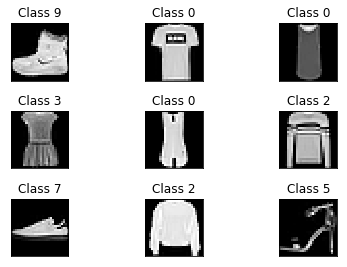

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(x_train, y_train), (x_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

### Show first 9 images of dataset:
# Plot images
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Class {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

### Scale X such that training can be done more efficiently:
print("Minimum value in matrix X:", np.min(x_train))
print("Maximum value in matrix X:", np.max(x_train))
print("Now scaling into range (0,1)")
print("Minimum value in matrix X:", np.min(x_train))
print("Maximum value in matrix X:", np.max(x_train))
input_shape = (x_train.shape[1], x_train.shape[2], 1)
## Preprocess 
x_train = x_train.astype('float32') / np.max(x_train)
x_test = x_test.astype('float32') / np.max(x_test)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

### Now define the architecture for the CNN autoencoder

In [2]:
## Import keras modules for defining architecture
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, UpSampling2D

conv_autoencoder = Sequential()

##### Encoder Part #####
print("Definining encoder part of cnn autoencoder:")
#### 1. Convolutional Layer with relu####
conv_autoencoder.add(Conv2D(32, (3, 3),
                            padding='same', input_shape=input_shape,
                            activation='relu', name='enc_conv_layer_1_relu'))

## Add BatchNormalization
conv_autoencoder.add(BatchNormalization(name='enc_batch_normal_layer_1'))
## Add MaxPooling to shrink dimension
conv_autoencoder.add(MaxPooling2D((2,2), padding='same', name='enc_max_pooling_layer_1'))

#### 2. Covolutional Layer with kernel initializer and lecun_normal activation ####
conv_autoencoder.add(Conv2D(16, (3, 3),
                            activation='selu', padding='same',
                            kernel_initializer='lecun_normal', name='enc_conv_layer_2_selu'))
## Add Maxpooling to shrink dimension
conv_autoencoder.add(MaxPooling2D((2,2), padding='same', name='enc_max_pooling_layer_2'))

#### 3. Convolutional Layer with kernel initializer and softplus activation ####
conv_autoencoder.add(Conv2D(8, (3, 3),
                            activation='softplus', padding='same',
                            kernel_initializer='RandomNormal', name='enc_conv_layer_3_softplus'))

conv_autoencoder.add(BatchNormalization(name='enc_batch_normal_layer_3'))
## Add Maxpooling as last dimension shrinkage for the encoder part
conv_autoencoder.add(MaxPooling2D((2, 2), padding='same', name='max_pooling_layer_3'))

print("Convolutional Neural Net Encoder Part:")
print(conv_autoencoder.summary())
print("The output shape of the encoder part is:", conv_autoencoder.output_shape)
print("Flatten version has",
      conv_autoencoder.output_shape[1]*conv_autoencoder.output_shape[2]*conv_autoencoder.output_shape[3], "entries.")

##### Decoder Part #####
print("Definining decoder part of cnn autoencoder:")

#### 4. Convolutional Layer with relu activation ####
conv_autoencoder.add(Conv2D(8, (3, 3),
                            activation='relu', padding='same',
                            kernel_initializer='lecun_normal', name='dec_conv_layer_4_relu'))
conv_autoencoder.add(BatchNormalization(name='dec_batch_normal_layer_4'))
#### Add deconvolution or rather transposed convolution
conv_autoencoder.add(UpSampling2D((2, 2), name='dec_upsample_conv_layer4'))

#### 5. Convolutional Layer with relu activation ####
conv_autoencoder.add(Conv2D(16, (3, 3),
                            activation='relu', padding='same',
                            kernel_initializer='lecun_normal', name='dec_conv_layer_5_relu'))
conv_autoencoder.add(BatchNormalization(name='dec_batch_normal_layer_5'))
#### Add deconvolution or rather transposed convolution
conv_autoencoder.add(UpSampling2D((2, 2), name='dec_upsample_conv_layer5'))

#### 6. Convolutional Layer with relu activation ####
conv_autoencoder.add(Conv2D(32, (3, 3),
                            activation='relu', padding='valid',
                            kernel_initializer='lecun_normal', name='dec_conv_layer_6_relu'))
conv_autoencoder.add(BatchNormalization(name='dec_batch_normal_layer_6'))
#### Add deconvolution or rather transposed convolution
conv_autoencoder.add(UpSampling2D((2, 2), name='dec_upsample_conv_layer6'))

#### 7. Convolutional Layer with relu activation as decoder part, hence number of filters only 1####
conv_autoencoder.add(Conv2D(1, (3, 3),
                            activation='sigmoid', padding='same',
                            kernel_initializer='lecun_normal', name='dec_conv_layer_7_relu'))

print(conv_autoencoder.summary())

Using TensorFlow backend.


Definining encoder part of cnn autoencoder:
Convolutional Neural Net Encoder Part:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
enc_conv_layer_1_relu (Conv2 (None, 28, 28, 32)        320       
_________________________________________________________________
enc_batch_normal_layer_1 (Ba (None, 28, 28, 32)        128       
_________________________________________________________________
enc_max_pooling_layer_1 (Max (None, 14, 14, 32)        0         
_________________________________________________________________
enc_conv_layer_2_selu (Conv2 (None, 14, 14, 16)        4624      
_________________________________________________________________
enc_max_pooling_layer_2 (Max (None, 7, 7, 16)          0         
_________________________________________________________________
enc_conv_layer_3_softplus (C (None, 7, 7, 8)           1160      
___________________________________________________________

### Now we train the model and save the call back history on local machine

In [3]:
import os
print(os.getcwd())

C:\Users\tuan.le\Desktop\DeepLearning_AutoEncoders


In [ ]:
from keras.losses import binary_crossentropy
from keras.optimizers import adam
from keras.callbacks import ModelCheckpoint

conv_autoencoder.compile(
            loss = binary_crossentropy,
            optimizer = adam(lr = 1e-3),
            metrics = ['accuracy']
        )
callbacks = [
            ModelCheckpoint(filepath = 'cnn_autencoder.hdf5', monitor = 'val_acc',
                save_best_only = True, verbose=1, mode = 'max')
            ]

import datetime
start_train = datetime.datetime.now()
history = conv_autoencoder.fit(
            x=x_train, y=x_train,
            epochs=50,
            batch_size=256,
            shuffle=True,
            validation_data=(x_test, x_test),
            callbacks = callbacks
        )
end_train = datetime.datetime.now()
time_train = end_train - start_train
print("Training took:", time_train)

# model performance
train_results = conv_autoencoder.evaluate(x_train, x_train)
test_results = conv_autoencoder.evaluate(x_test, x_test)
print("Train       Loss: ", train_results[0])
print("Train       Acc: ",  train_results[1])
print("Validation  Loss:",  test_results[0])
print("Validation  Acc: ",  test_results[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 485s 8ms/step - loss: 0.3711 - acc: 0.4927 - val_loss: 0.3365 - val_acc: 0.4937

Epoch 00001: val_acc improved from -inf to 0.49371, saving model to cnn_autencoder.hdf5
Epoch 2/50
60000/60000 [==============================] - 490s 8ms/step - loss: 0.2986 - acc: 0.5055 - val_loss: 0.3102 - val_acc: 0.4996

Epoch 00002: val_acc improved from 0.49371 to 0.49959, saving model to cnn_autencoder.hdf5
Epoch 3/50
60000/60000 [==============================] - 497s 8ms/step - loss: 0.2911 - acc: 0.5062 - val_loss: 0.2990 - val_acc: 0.5021

Epoch 00003: val_acc improved from 0.49959 to 0.50209, saving model to cnn_autencoder.hdf5
Epoch 4/50
60000/60000 [==============================] - 514s 9ms/step - loss: 0.2873 - acc: 0.5067 - val_loss: 0.2962 - val_acc: 0.5026

Epoch 00004: val_acc improved from 0.50209 to 0.50255, saving model to cnn_autencoder.hdf5
Epoch 5/50
60000/60000 [=========